In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

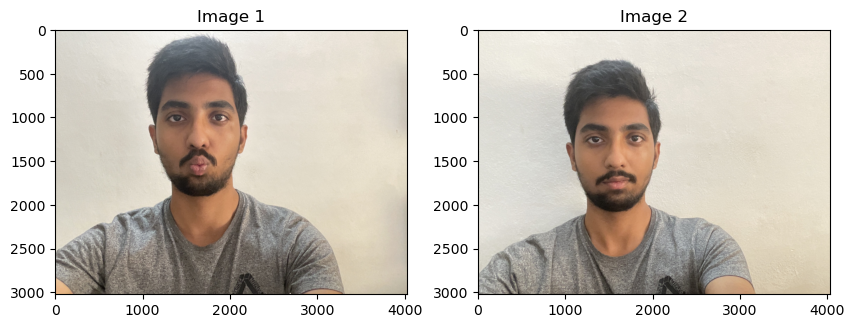

In [2]:
# image1 = cv2.imread('./img1.png', cv2.IMREAD_COLOR)
# image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
# image2 = cv2.imread('./img2.jpeg', cv2.IMREAD_COLOR)
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

image1 = cv2.imread('./srihari_img/img1.jpg', cv2.IMREAD_COLOR)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread('./srihari_img/img2.jpg', cv2.IMREAD_COLOR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)



# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('Image 2')

plt.show()

In [6]:
def detect_face_mouth(img,show = True):
    
    img_rgb = np.copy(img)
    # Load the pre-trained face cascade and mouth cascade
    face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
    mouth_cascade = cv2.CascadeClassifier('./haarcascade_mcs_mouth.xml')

    # Convert the image to grayscale
    gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Loop over the detected faces
    for (x, y, w, h) in faces:
        # Draw a rectangle around the detected face
        cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # Add extra margin to the bottom half of the face region
        margin = 50
        roi_face = gray[y + h//2:y + h + margin, x:x + w]

        # Detect mouth within the extended face region
        mouth_rects = mouth_cascade.detectMultiScale(gray, scaleFactor=1.8, minNeighbors=15, minSize=(25, 15))

        # Check if a mouth is detected
        if len(mouth_rects) > 0:
            # Get the largest detected mouth region
            largest_mouth = max(mouth_rects, key=lambda rect: rect[2] * rect[3])

            # Expand the detected mouth region slightly
            x_mouth, y_mouth, w_mouth, h_mouth = largest_mouth
            expanded_mouth_rect = (x + x_mouth, y + h//2 + y_mouth, w_mouth, h_mouth)
            
            if (not show):
                x, y, w, h = expanded_mouth_rect[0], expanded_mouth_rect[1], expanded_mouth_rect[2], expanded_mouth_rect[3]
                return ([y,y+h,x,x+w])

            # Draw a rectangle around the largest detected mouth region
            cv2.rectangle(img_rgb, (expanded_mouth_rect[0], expanded_mouth_rect[1]),
                          (expanded_mouth_rect[0] + expanded_mouth_rect[2], expanded_mouth_rect[1] + expanded_mouth_rect[3]),
                          (0, 255, 0), 2)
    return img_rgb


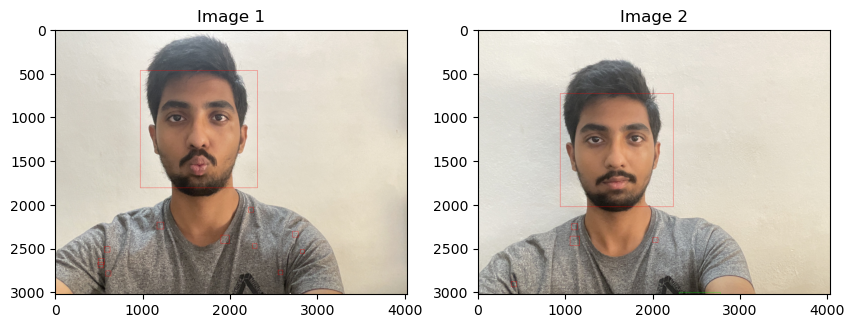

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(detect_face_mouth(image1))
plt.title('Image 1')

plt.subplot(1, 2, 2)
plt.imshow(detect_face_mouth(image2))
plt.title('Image 2')

plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

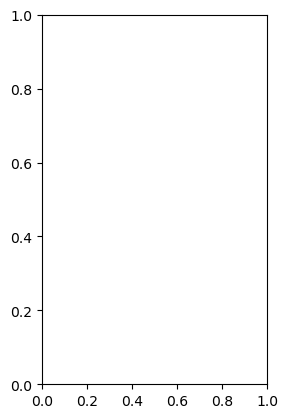

In [5]:
mouth1 = detect_face_mouth(image1,show=False)
mouth2 = detect_face_mouth(image2,show=False)
plt.subplot(1,2,1)
plt.imshow( image1[mouth1[0]:mouth1[1],mouth1[2]:mouth1[3]] );
plt.subplot(1,2,2)
plt.imshow(image2[mouth2[0]:mouth2[1],mouth2[2]:mouth2[3]]);

In [ ]:
def swap_and_resize_mouths(image1, image2):
    # Detect mouths in the images
    mouth1 = detect_face_mouth(image1, show=False)
    mouth2 = detect_face_mouth(image2, show=False)

    # Extract mouth regions from the images
    mouth_region1 = image1[mouth1[0]:mouth1[1], mouth1[2]:mouth1[3]]
    mouth_region2 = image2[mouth2[0]:mouth2[1], mouth2[2]:mouth2[3]]

    # Resize mouths to fit the corresponding sizes
    resized_mouth1 = cv2.resize(mouth_region1, (mouth_region2.shape[1], mouth_region2.shape[0]))
    resized_mouth2 = cv2.resize(mouth_region2, (mouth_region1.shape[1], mouth_region1.shape[0]))

    # Swap and paste the resized mouths to the original images
    image1_copy = image1.copy()
    image1_copy[mouth1[0]:mouth1[1], mouth1[2]:mouth1[3]] = resized_mouth2

    image2_copy = image2.copy()
    image2_copy[mouth2[0]:mouth2[1], mouth2[2]:mouth2[3]] = resized_mouth1

    return image1_copy, image2_copy

In [ ]:
# Usage example:
image1_result, image2_result = swap_and_resize_mouths(image1, image2)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image1_result)
plt.title('Image 1 Result')

plt.subplot(1, 2, 2)
plt.imshow(image2_result)
plt.title('Image 2 Result')

plt.show()